<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Data%20Mining%20Advanced%20Dimensionality%20Reduction/Data_Mining_Assignment_Advanced_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying the following Dimensionality Reduction techniques
- MDS
- LLE
- Isomap
- Factor Analysis
- Randomized PCA
- Incremental PCA
- Kernel PCA
- UMAP
- Autocoder

**Dimensionality reduction with MDS**

Imports

In [6]:
import pandas as pd 

import plotly.express as px 
import matplotlib.pyplot as plt

# Sklearn
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

Since we are performing dimensionality reduction using MDS on a image of swiss role, plotting the image here

In [7]:
# Make a swiss roll
X, y = make_swiss_roll(n_samples=2000, noise=0.05)
X[:, 1] *= .5


# Create a 3D scatter plot
fig = px.scatter_3d(None, x=X[:,0], y=X[:,1], z=X[:,2], color=y,)

fig.update_layout(#title_text="Swiss Roll",
                  showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=1.25, y=1.5, z=1)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

fig.update_traces(marker=dict(size=3, 
                              line=dict(color='black', width=0.1)))

fig.update(layout_coloraxis_showscale=False)
fig.show()

Applying MDS here

In [8]:
### Step 1 - Configure MDS function, note we use default hyperparameter values for this example
model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_trans = model2d.fit_transform(X)
    
### Step 3 - Print a few stats
print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)
print('Stress: ', model2d.stress_)

The new shape of X:  (2000, 2)
No. of Iterations:  71
Stress:  3349973.4577354486


Plotting the figure after MDS transformation

In [9]:
# Create a scatter plot
fig = px.scatter(None, x=X_trans[:,0], y=X_trans[:,1], opacity=1, color=y)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="MDS Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show()

**Non-linear Dimensionality Reduction using Isomap**

Load the digits data

In [10]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


visualizing first 10 digits of the data

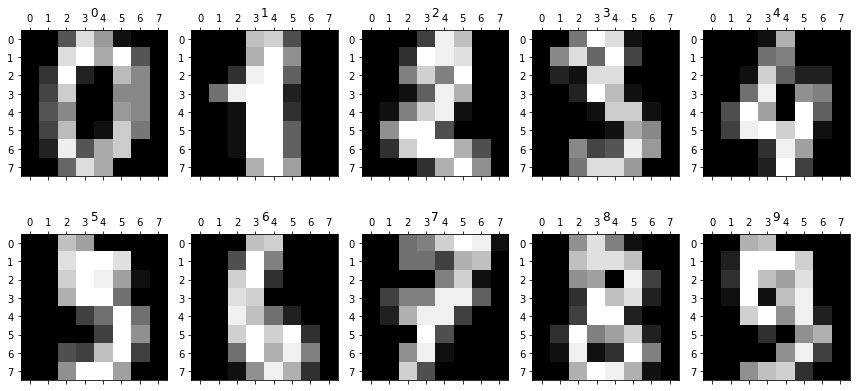

In [11]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

Applying Isomap here

In [12]:
#Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
embed3 = Isomap(
    n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', 
    tol=0, 
    max_iter=None, 
    path_method='auto', 
    neighbors_algorithm='auto', 
    n_jobs=-1,
    metric='minkowski', 
    p=2,
    metric_params=None 
)

#Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = embed3.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



The new shape of X:  (1797, 3)


Visualizing data after reducing dimension to 3 

In [13]:
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )


fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))


fig.update_traces(marker=dict(size=2))

fig.show()

**Dimensionality reduction using LLE and Isomap**

Import statements

In [14]:
import pandas as pd 
import numpy as np

import plotly.express as px # for data visualization

from sklearn.datasets import make_swiss_roll # for creating swiss roll
from sklearn.manifold import LocallyLinearEmbedding as LLE # for LLE dimensionality reduction
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

Plotting a swiss roll

In [15]:
X, y = make_swiss_roll(n_samples=2000, noise=0.05)
X[:, 1] *= .5



fig = px.scatter_3d(None, x=X[:,0], y=X[:,1], z=X[:,2], color=y,)

fig.update_layout(#title_text="Swiss Roll",
                  showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=1.25, y=1.5, z=1)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

fig.update_traces(marker=dict(size=3, 
                              line=dict(color='black', width=0.1)))

fig.update(layout_coloraxis_showscale=False)
fig.show()

Function for performing LLE

In [16]:
def run_lle(num_neighbors, dims, mthd, data):
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=dims, # default=2, number of dimensions of the new space 
                    reg=0.001, 
                    eigen_solver='auto', 
                    method=mthd, 
                    modified_tol=1e-12,
                    neighbors_algorithm='auto', 
                    random_state=42, 
                    n_jobs=-1 
                   )

    result = embed_lle.fit_transform(data)
    

    return result

Function for performing Isomap

In [17]:
def run_isomap(num_neighbors, dims, data):
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    result = embed_isomap.fit_transform(data)
    
    return result

Perform LLE on a the swiss roll


In [18]:
lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=X)

In [19]:
# Create a 3D scatter plot
def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )
    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig
    
    
# Create a 2D scatter plot
def Plot2D(X, y, plot_name):
    fig = px.scatter(None, x=X[:,0], y=X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    fig.update_layout(dict(plot_bgcolor = 'white'))

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_layout(title_text=plot_name)

    fig.update_traces(marker=dict(size=5,
                                 line=dict(color='black', width=0.3)))
    return fig

In [20]:
Plot2D(lle_res, y, 'LLE with swiss roll')

Perform Isomap on the swiss roll

In [21]:
isomap_res=run_isomap(num_neighbors=30, dims=2, data=X)

In [22]:
Plot2D(isomap_res, y, 'Isomap on swiss roll')

**Dimensionality Reduction with Factor Analysis**

Import statements

In [23]:
from sklearn.decomposition import FactorAnalysis 
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd
from numpy import where
import matplotlib.pyplot as plt 

Getting the MNIST digit dataset

In [24]:
(x_train, y_train), (_ , _) = mnist.load_data()
print(x_train.shape)
 
(60000, 28, 28)
 
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)
 
(60000, 784) 

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)


(60000, 784)

Define the model using Factor Analysis

In [25]:
fa = FactorAnalysis(n_components=2, random_state=123)
z = fa.fit_transform(x_mnist)  

Visualizing Data

[Text(0.5, 1.0, 'MNIST data projection with Factor Analysis')]

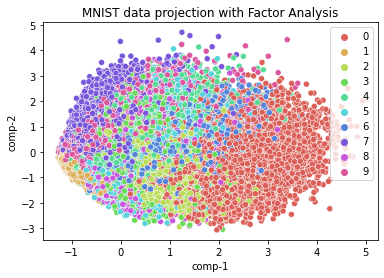

In [26]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data projection with Factor Analysis")

Getting image data to perform factor analysis

In [27]:
digit3_y = where(y_train==3)
digit3_x = x_train[digit3_y]

x_mnist = reshape(digit3_x, [digit3_x.shape[0], digit3_x.shape[1]*digit3_x.shape[2]])
print(x_mnist.shape)
 
(6131, 784) 

(6131, 784)


(6131, 784)

Factor analysis on image data

(10, 784)


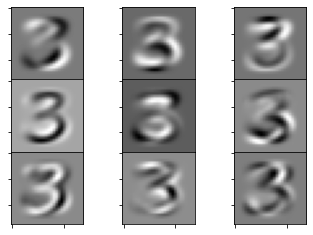

In [28]:
fa = FactorAnalysis(n_components=10, random_state=123)
z = fa.fit(x_mnist)

print(z.components_.shape)

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.gray()
for i in range(0, 9):	
    plt.subplot(3, 3, i + 1) 
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.imshow(z.components_[i].reshape(28,28), )
    
plt.show()

**Dimesionality Reduction with Randomized PCA**

Import statements

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import KernelPCA

Trial data

In [30]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

Create instance of PCA with randomized svd_solver

In [31]:
pca = PCA(n_components = 2, svd_solver ='randomized')
 
#Taking a matrix and return the U, Sigma and VT elements
U, S, VT = randomized_svd(X, n_components = 2)
 
# matrix returned by randomized_svd
print(f"Matrix U of size m * m: {U}\n")
print(f"Matrix S of size m * n: {S}\n")
print(f"Matrix V ^ T of size n * n: {VT}\n")

Matrix U of size m * m: [[ 0.21956688 -0.53396977]
 [ 0.35264795  0.45713538]
 [ 0.57221483 -0.07683439]
 [-0.21956688  0.53396977]
 [-0.35264795 -0.45713538]
 [-0.57221483  0.07683439]]

Matrix S of size m * n: [6.30061232 0.54980396]

Matrix V ^ T of size n * n: [[-0.83849224 -0.54491354]
 [-0.54491354  0.83849224]]



/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:368: FutureWarning:

If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.



Fitting the PCA model

In [32]:
pca.fit(X)

PCA(n_components=2, svd_solver='randomized')

In [33]:
print("Explained Variance using PCA with randomized svd_solver:", pca.explained_variance_ratio_)

Explained Variance using PCA with randomized svd_solver: [0.99244289 0.00755711]


**Dimensionality Reduction with Incremental PCA**

Import statements

In [34]:
import numpy as np
import pandas as pd
import os
import pickle as pk
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt

Incremental PCA

In [35]:
ipca = IncrementalPCA(batch_size=10)

In [36]:
ipca.fit(X)

IncrementalPCA(batch_size=10)

View results

In [37]:
cum_expl_var_ratio = np.cumsum(ipca.explained_variance_ratio_)

In [38]:
threshold = 0.99 

Number of components explaining 99% variance: 0




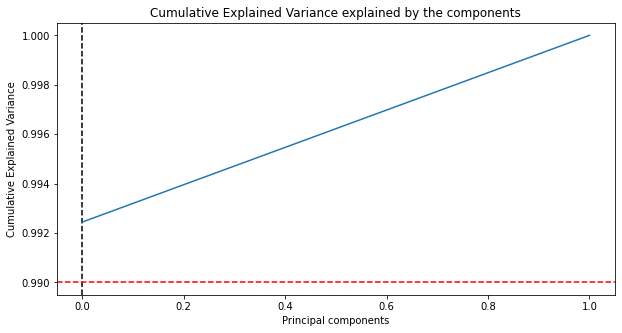

In [39]:
# Get cumulative variance
cum_var = np.cumsum(ipca.explained_variance_ratio_)


k = np.argmax(cum_var>threshold)
print(f'Number of components explaining {threshold:.0%} variance: {k}')
print('\n')

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=threshold, color="r", linestyle="--")
ax = plt.plot(cum_var)

**Kernel PCA**

Import statements

In [40]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [41]:
X, y = make_circles(n_samples=200, random_state=1, noise=0.1, factor=0.1)

In [42]:
df =pd.DataFrame(X)
df.columns=['a','b']
df["y"]=y

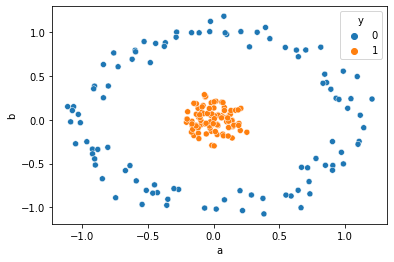

In [43]:
sns.scatterplot(data=df,x='a',y='b', hue="y")

Applying kernel PCA

In [44]:
kpca = KernelPCA(kernel="rbf", 
                 fit_inverse_transform=True,
                 gamma=10,
                n_components=2)
X_kpca = kpca.fit_transform(X)

In [45]:
kpca_res = pd.DataFrame(X_kpca)
kpca_res.columns=["kpc1","kpc2"]
kpca_res['y']=y
kpca_res.head()

,kpc1,kpc2,y
0,-0.432325,-0.000974,0
1,-0.416189,-0.004341,0
2,-0.436859,-0.006116,0
3,0.555051,0.296390,1
4,0.594158,-0.000066,1


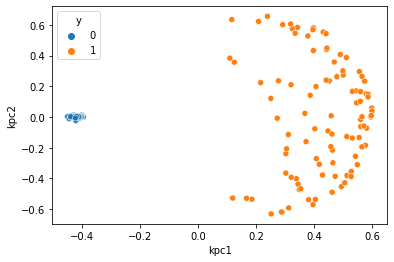

In [46]:
sns.scatterplot(data=kpca_res,x='kpc1',y='kpc2', hue="y")

**UMAP**

In [47]:
!pip uninstall umap

In [48]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 9.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=db094ad44d5db95044613b86d86bf0d5e21087b846d09d57bb8cac15c8a765e2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=628a3c1f9e5c5930aff04002685eb98677ff1df62b7c02db8e70e2cae837c42a
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


Import statements

In [49]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from umap import UMAP

Load digits data

Shape of digit images:  (1797, 8, 8)
Shape of X (main data):  (1797, 64)
Shape of y (true labels):  (1797,)


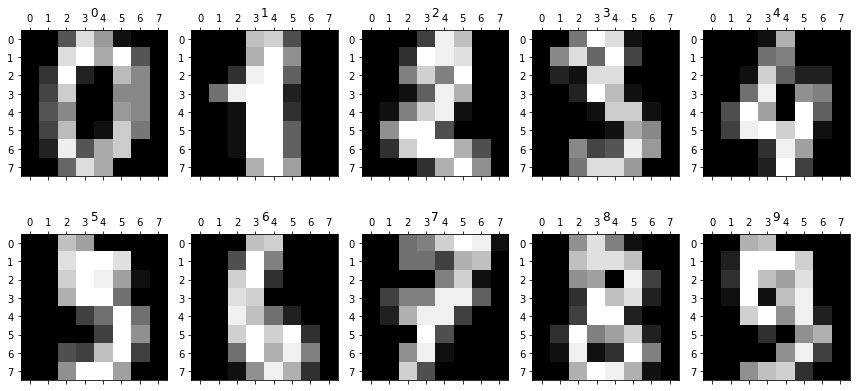

In [50]:
digits = load_digits()

X, y = load_digits(return_X_y=True)

print('Shape of digit images: ', digits.images.shape)
print('Shape of X (main data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

This function is to display and visualize data

In [51]:
def chart(X, y):
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
  
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    df['label'] = df['label'].astype(int)
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
  
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

Configure and Apply UMAP on the dataset

In [52]:
reducer = UMAP(n_neighbors=100, 
               n_components=3, 
               metric='euclidean',
               n_epochs=1000,  
               learning_rate=1.0, 
               init='spectral', 
               min_dist=0.1, 
               spread=1.0, 
               low_memory=False, 
               set_op_mix_ratio=1.0, 
               local_connectivity=1, 
               repulsion_strength=1.0, 
               negative_sample_rate=5, 
               transform_queue_size=4.0, 
               a=None, 
               b=None, 
               random_state=42, 
               metric_kwds=None, 
               angular_rp_forest=False, 
               target_n_neighbors=-1, 
               transform_seed=42,
               verbose=False,
               unique=False,
)

# Fit and transform the data
X_trans = reducer.fit_transform(X)

# Check the shape of the new data
print('Shape of X_trans: ', X_trans.shape)

Shape of X_trans:  (1797, 3)


In [53]:
chart(X_trans, y)

Autoencoder

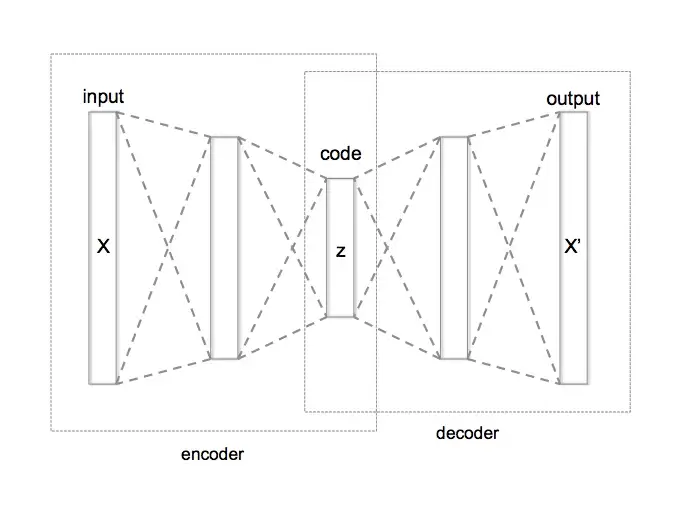

Import statements

Using Keras for autoencoder

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU

Taken dataset from kaggle

Using min max scaling for data preprocessing

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/input.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/test.csv")

df_features = df.loc[:, df.columns != "target"]
y_train = df.target

df_features_test = df_test.loc[:, df_test.columns != "target"]
y_test = df_test.target

scaler = MinMaxScaler()
df_features = scaler.fit_transform(df_features)
df_features_test = scaler.transform(df_features_test)

Implementation of the Autoencoder Model

In [56]:
input = Input(shape=df_features.shape[1:])
enc = Dense(64)(input)
enc = LeakyReLU()(enc)
enc = Dense(32)(enc)
enc = LeakyReLU()(enc)

latent_space = Dense(16, activation="tanh")(enc)

dec = Dense(32)(latent_space)
dec = LeakyReLU()(dec)
dec = Dense(64)(dec)
dec = LeakyReLU()(dec)

dec = Dense(units=df_features.shape[1], activation="sigmoid")(dec)
# init model
autoencoder = Model(input, dec)
# compile model
autoencoder.compile(optimizer = "adam",metrics=["mse"],loss="mse")
# train model
autoencoder.fit(df_features, df_features, epochs=50, batch_size=32, validation_split=0.25)

Epoch 1/50
65/65 [==============================] - 1s 7ms/step - loss: 0.0741 - mse: 0.0741 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 3/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/50
65/65 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.00

Creating Model

In [57]:
encoder = Model(input, latent_space)

Performing dimensionality reduction

In [58]:
test_au_features = encoder.predict(df_features_test)

8/8 [==============================] - 0s 2ms/step


In [59]:
print(test_au_features.shape)

(247, 16)
